# Pitch Deck Dataset Data Cleaning

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
df = pd.read_csv('data/falory_clean_round.csv')

amount raised

In [3]:
df.head()


,Name,Description,Sector,Business,Round,AmountRaised,Investor,Year,Links,Location,customer_B2B,customer_B2B2C,customer_B2C,customer_B2G,customer_C2C
0,Airbnb,Airbnb is an online marketplace for people to ...,2,1,1,$600K,"VC, Angel Investors",2008,"['https://airbnb.com/', 'https://www.crunchbas...","['San Francisco', 'California', 'United States']",1,0,1,0,0
1,Alan,Alan is a platform that uses technology to mak...,1,3,4,$54M,VC,2020,"['https://alan.com/', 'https://www.crunchbase....","['Paris', 'Ile-de-France', 'France']",1,0,0,0,0
2,Apptopia,Apptopia serves the mobile industry with an ar...,0,1,2,$1.46M,VC,2018,"['http://www.apptopia.com/', 'https://www.crun...","['Boston', 'Massachusetts', 'United States']",1,0,0,0,0
3,Beatdapp,Beatdapp provides real-time tracking of media ...,3,0,1,$2.4M,VC,2019,"['https://beatdapp.com/', 'https://www.crunchb...","['Vancouver', 'British Columbia', 'Canada']",1,0,0,0,0
4,Bind,"Bind provides personalized, cost-transparent a...",5,1,2,$60M,VC,2018,"['https://www.yourbind.com/', 'https://www.cru...","['Minneapolis', 'Minnesota', 'United States']",1,0,1,0,0


Undisclosed

In [4]:
df[df['AmountRaised']=='Undisclosed'].head()

,Name,Description,Sector,Business,Round,AmountRaised,Investor,Year,Links,Location,customer_B2B,customer_B2B2C,customer_B2C,customer_B2G,customer_C2C
65,Agfunder,AgFunder is a venture capital platform that fo...,2,1,1,Undisclosed,Undisclosed,2017,"['https://agfunder.com/', 'https://www.crunchb...","['San Francisco', 'California', 'United States']",1,0,0,0,0
66,AirHub,AirHub is the next generation of drone managem...,3,0,0,Undisclosed,Undisclosed,2018,"['https://www.airhub.app/', 'https://www.crunc...","['Valkenburg', 'Zuid-Holland', 'The Netherlands']",1,0,0,0,0
68,AlfredCamera,Alfred empowers everyone to feel safe and secu...,2,3,1,Undisclosed,Undisclosed,2015,"['https://alfred.camera/', 'https://www.crunch...","['Taipei', ""T'ai-pei"", 'Taiwan']",0,0,1,0,0
71,Alloy Card,Klutch (previously Alloy Card) turns your cred...,1,3,1,Undisclosed,Undisclosed,2019,"['https://www.alloycard.com/', 'https://www.cr...","['San Francisco', 'California', 'United States']",0,0,1,0,0
98,Biomarker Labs,Biomarker is a mobile app that helps you measu...,5,3,1,Undisclosed,Undisclosed,2017,"['https://www.biomarker.io/', 'https://www.cru...","['San Francisco', 'California', 'United States']",1,0,0,0,0


In [5]:
print(len(df[df['AmountRaised']=='Undisclosed']))

47


In [6]:
df = df[df['AmountRaised']!='Undisclosed'] #47

In [7]:
df.head()

,Name,Description,Sector,Business,Round,AmountRaised,Investor,Year,Links,Location,customer_B2B,customer_B2B2C,customer_B2C,customer_B2G,customer_C2C
0,Airbnb,Airbnb is an online marketplace for people to ...,2,1,1,$600K,"VC, Angel Investors",2008,"['https://airbnb.com/', 'https://www.crunchbas...","['San Francisco', 'California', 'United States']",1,0,1,0,0
1,Alan,Alan is a platform that uses technology to mak...,1,3,4,$54M,VC,2020,"['https://alan.com/', 'https://www.crunchbase....","['Paris', 'Ile-de-France', 'France']",1,0,0,0,0
2,Apptopia,Apptopia serves the mobile industry with an ar...,0,1,2,$1.46M,VC,2018,"['http://www.apptopia.com/', 'https://www.crun...","['Boston', 'Massachusetts', 'United States']",1,0,0,0,0
3,Beatdapp,Beatdapp provides real-time tracking of media ...,3,0,1,$2.4M,VC,2019,"['https://beatdapp.com/', 'https://www.crunchb...","['Vancouver', 'British Columbia', 'Canada']",1,0,0,0,0
4,Bind,"Bind provides personalized, cost-transparent a...",5,1,2,$60M,VC,2018,"['https://www.yourbind.com/', 'https://www.cru...","['Minneapolis', 'Minnesota', 'United States']",1,0,1,0,0


seperate out currency and amount raised missing amount raised

In [8]:
# we go through each currency and convert it to text.
currency = df['AmountRaised'].str.replace('â\x82¬', 'EUR ') # find unicode symbol for euro and replace with text
currency = currency.str.replace('CA$', 'CAD ') # replace canadian dollar
currency = currency.str.replace('$', 'USD ') # replace dollar
currency = currency.str.replace('Â£', 'GBP ') # replace pound
#currency_issues = currency[currency.str.contains("â\x82¬")]
currency_labels = currency.unique()
print(currency_labels)

['USD 600K' 'USD 54M' 'USD 1.46M' 'USD 2.4M' 'USD 60M' 'EUR 21M'
 'USD 1.2M' 'USD 135M' 'USD 57M' 'USD 500K' 'USD 102M' 'USD 3.5M'
 'USD 70M' 'USD 94M' 'USD 5M' 'USD 30M' 'USD 13.8B' 'USD 1.4M' 'USD 10M'
 'USD 9M' 'EUR 2.5M' 'USD 1M' 'USD 100M' 'USD 56M' 'USD 43M' 'USD 37M'
 'USD 50M' 'USD 6.5M' 'USD 65M' 'USD 19.3M' 'USD 16M' 'USD 2M' 'USD 400K'
 'USD 66M' 'USD 300M' 'USD 68M' 'USD 750K' 'USD 6.8B' 'USD 210M'
 'USD 200M' 'USD 192M' 'USD 28.5M' 'USD 1.3M' 'USD 200K' 'USD 53M'
 'USD 335M' 'USD 1.9M' 'USD 19M' 'USD 3.4M' 'USD 632K' 'USD 1.7M'
 'USD 18M' 'USD 2.2M' 'USD 125K' 'USD 6M' 'USD 5.3M' 'USD 100K'
 'USD 299.6K' 'USD 5.8M' 'USD 2.5M' 'USD 465K' 'USD 725K' 'USD 713K'
 'USD 15M' 'USD 36M' 'USD 650K' 'USD 1.6M' 'USD 760K' 'USD 150K' 'CAD 1M'
 'USD 255K' 'USD 800K' 'USD 16.7M' 'USD 4M' 'USD 2.1M' 'USD 460K'
 'USD 425K' 'USD 300K' 'USD 515K' 'USD 12.5M' 'USD 3M' 'USD 120K'
 'USD 17M' 'USD 10.3M' 'USD 1.1M' 'USD 1.5M' 'USD 16.5M' 'USD 20M'
 'USD 13M' 'USD 7M' 'USD 35M' 'USD 1.12M' 'USD 

In [9]:
#now replace old amount raised with new cleaned one
df['AmountRaised'] = currency
df.head()

,Name,Description,Sector,Business,Round,AmountRaised,Investor,Year,Links,Location,customer_B2B,customer_B2B2C,customer_B2C,customer_B2G,customer_C2C
0,Airbnb,Airbnb is an online marketplace for people to ...,2,1,1,USD 600K,"VC, Angel Investors",2008,"['https://airbnb.com/', 'https://www.crunchbas...","['San Francisco', 'California', 'United States']",1,0,1,0,0
1,Alan,Alan is a platform that uses technology to mak...,1,3,4,USD 54M,VC,2020,"['https://alan.com/', 'https://www.crunchbase....","['Paris', 'Ile-de-France', 'France']",1,0,0,0,0
2,Apptopia,Apptopia serves the mobile industry with an ar...,0,1,2,USD 1.46M,VC,2018,"['http://www.apptopia.com/', 'https://www.crun...","['Boston', 'Massachusetts', 'United States']",1,0,0,0,0
3,Beatdapp,Beatdapp provides real-time tracking of media ...,3,0,1,USD 2.4M,VC,2019,"['https://beatdapp.com/', 'https://www.crunchb...","['Vancouver', 'British Columbia', 'Canada']",1,0,0,0,0
4,Bind,"Bind provides personalized, cost-transparent a...",5,1,2,USD 60M,VC,2018,"['https://www.yourbind.com/', 'https://www.cru...","['Minneapolis', 'Minnesota', 'United States']",1,0,1,0,0


In [10]:
#Split currency name and amount into two different columns
df[['Currency', 'AmountRaised']] = df['AmountRaised'].str.split(' ', expand=True)
# Reorganize column order with 'Currency' before 'AmountRaised'
column_order = ['Name', 'Description', 'Sector', 'Business', 'customer_B2B', 'customer_B2B2C', 'customer_B2C', 'customer_B2G', 'customer_C2C',
                'Round', 'Currency', 'AmountRaised', 'Investor', 'Year', 'Links', 'Location']
df = df[column_order]
df.head()

,Name,Description,Sector,Business,customer_B2B,customer_B2B2C,customer_B2C,customer_B2G,customer_C2C,Round,Currency,AmountRaised,Investor,Year,Links,Location
0,Airbnb,Airbnb is an online marketplace for people to ...,2,1,1,0,1,0,0,1,USD,600K,"VC, Angel Investors",2008,"['https://airbnb.com/', 'https://www.crunchbas...","['San Francisco', 'California', 'United States']"
1,Alan,Alan is a platform that uses technology to mak...,1,3,1,0,0,0,0,4,USD,54M,VC,2020,"['https://alan.com/', 'https://www.crunchbase....","['Paris', 'Ile-de-France', 'France']"
2,Apptopia,Apptopia serves the mobile industry with an ar...,0,1,1,0,0,0,0,2,USD,1.46M,VC,2018,"['http://www.apptopia.com/', 'https://www.crun...","['Boston', 'Massachusetts', 'United States']"
3,Beatdapp,Beatdapp provides real-time tracking of media ...,3,0,1,0,0,0,0,1,USD,2.4M,VC,2019,"['https://beatdapp.com/', 'https://www.crunchb...","['Vancouver', 'British Columbia', 'Canada']"
4,Bind,"Bind provides personalized, cost-transparent a...",5,1,1,0,1,0,0,2,USD,60M,VC,2018,"['https://www.yourbind.com/', 'https://www.cru...","['Minneapolis', 'Minnesota', 'United States']"


In [11]:
def convert_amount_string_to_number(amount_str):
    if amount_str is None:
        return None  # Handle None values by returning None
    amount_str = amount_str.lower()  # Convert to lowercase to handle 'K' or 'k'
    if amount_str.endswith('b'):
        return float(amount_str.replace('b', '')) * 1000000000
    elif amount_str.endswith('m'):
        return float(amount_str.replace('m', '')) * 1000000
    elif amount_str.endswith('k'):
        return float(amount_str.replace('k', '')) * 1000
    else:
        return float(amount_str)
    
df['AmountRaised'] = df['AmountRaised'].apply(convert_amount_string_to_number)
df.head()

,Name,Description,Sector,Business,customer_B2B,customer_B2B2C,customer_B2C,customer_B2G,customer_C2C,Round,Currency,AmountRaised,Investor,Year,Links,Location
0,Airbnb,Airbnb is an online marketplace for people to ...,2,1,1,0,1,0,0,1,USD,600000.0,"VC, Angel Investors",2008,"['https://airbnb.com/', 'https://www.crunchbas...","['San Francisco', 'California', 'United States']"
1,Alan,Alan is a platform that uses technology to mak...,1,3,1,0,0,0,0,4,USD,54000000.0,VC,2020,"['https://alan.com/', 'https://www.crunchbase....","['Paris', 'Ile-de-France', 'France']"
2,Apptopia,Apptopia serves the mobile industry with an ar...,0,1,1,0,0,0,0,2,USD,1460000.0,VC,2018,"['http://www.apptopia.com/', 'https://www.crun...","['Boston', 'Massachusetts', 'United States']"
3,Beatdapp,Beatdapp provides real-time tracking of media ...,3,0,1,0,0,0,0,1,USD,2400000.0,VC,2019,"['https://beatdapp.com/', 'https://www.crunchb...","['Vancouver', 'British Columbia', 'Canada']"
4,Bind,"Bind provides personalized, cost-transparent a...",5,1,1,0,1,0,0,2,USD,60000000.0,VC,2018,"['https://www.yourbind.com/', 'https://www.cru...","['Minneapolis', 'Minnesota', 'United States']"


In [12]:
currency_units = df['Currency'].unique()
print(currency_units)

['USD' 'EUR' 'CAD' 'AUSD' 'GBP']


In [13]:
# We define a mapping of currency conversion rates (fx rate as of 11 oct 2023 @11:30am)
currency_conversion = {
    'USD': 1.06,
    'EUR': 1.0,
    'GBP': 0.86,
    'CAD': 1.44,
    'AUSD': 1.30
}

# Apply the conversion to 'AmountRaised' based on 'Currency'
df['AmountRaisedEuro'] = df.apply(
    lambda row: row['AmountRaised'] * currency_conversion[row['Currency']] if row['Currency'] != 'Undisclosed' else row['AmountRaised'],
    axis=1
)

# Drop the 'Currency' and 'AmountRaised' columns
df = df.drop(['Currency', 'AmountRaised'], axis=1)

# Reorder the columns
column_order = ['Name', 'Description', 'Sector', 'Business', 'customer_B2B', 'customer_B2B2C', 'customer_B2C', 'customer_B2G', 'customer_C2C', 'Round', 'AmountRaisedEuro', 'Investor', 'Year', 'Links', 'Location']
df = df[column_order]

# Now, the 'AmountRaised_EUR' column contains the amounts in Euros (EUR), and 'Currency' and 'AmountRaised' columns are dropped
df.head()

,Name,Description,Sector,Business,customer_B2B,customer_B2B2C,customer_B2C,customer_B2G,customer_C2C,Round,AmountRaisedEuro,Investor,Year,Links,Location
0,Airbnb,Airbnb is an online marketplace for people to ...,2,1,1,0,1,0,0,1,636000.0,"VC, Angel Investors",2008,"['https://airbnb.com/', 'https://www.crunchbas...","['San Francisco', 'California', 'United States']"
1,Alan,Alan is a platform that uses technology to mak...,1,3,1,0,0,0,0,4,57240000.0,VC,2020,"['https://alan.com/', 'https://www.crunchbase....","['Paris', 'Ile-de-France', 'France']"
2,Apptopia,Apptopia serves the mobile industry with an ar...,0,1,1,0,0,0,0,2,1547600.0,VC,2018,"['http://www.apptopia.com/', 'https://www.crun...","['Boston', 'Massachusetts', 'United States']"
3,Beatdapp,Beatdapp provides real-time tracking of media ...,3,0,1,0,0,0,0,1,2544000.0,VC,2019,"['https://beatdapp.com/', 'https://www.crunchb...","['Vancouver', 'British Columbia', 'Canada']"
4,Bind,"Bind provides personalized, cost-transparent a...",5,1,1,0,1,0,0,2,63600000.0,VC,2018,"['https://www.yourbind.com/', 'https://www.cru...","['Minneapolis', 'Minnesota', 'United States']"


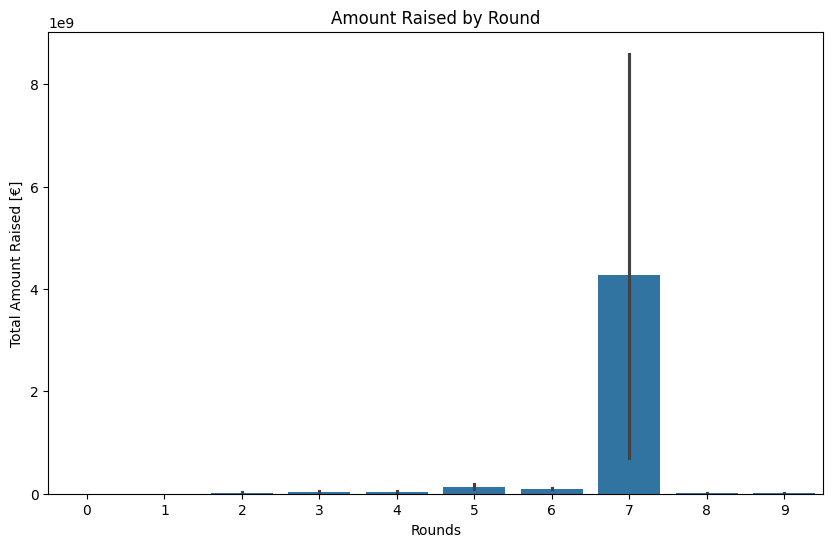

In [14]:
# Create the bar chart with the specified order
plt.figure(figsize=(10, 6))
sns.barplot(x='Round', y='AmountRaisedEuro', data=df)
plt.xlabel('Rounds')
plt.ylabel('Total Amount Raised [€]')
plt.title('Amount Raised by Round')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability

# Display the bar chart
plt.show()
#{'Pre-Seed': 0, 'Seed': 1, 'Series A': 2, 'Series B': 3, 'Series C': 4, 'Series D': 5, 'Series E': 6, 'Public': 7, 'Crowdfunding': 8, 'Debt Financing': 9}

In [15]:
df[df['Round']==9].head()

,Name,Description,Sector,Business,customer_B2B,customer_B2B2C,customer_B2C,customer_B2G,customer_C2C,Round,AmountRaisedEuro,Investor,Year,Links,Location
21,Fyre Festival,Fyre Festival was a failed musical festival or...,2,1,0,0,1,0,0,9,9540000.0,Angel Investors,2017,"['#', 'https://www.crunchbase.com/organization...","['New York', 'New York', 'United States']"
367,Contactually,Contactually is a relationship marketing platf...,3,0,1,0,0,0,0,9,3180000.0,Undisclosed,2016,"['https://www.contactually.com', 'https://www....","['Washington', 'District of Columbia', 'United..."


### save cleaned dataset

In [16]:
# Save the updated DataFrame to a new CSV file or overwrite the original one
df.to_csv('data/falory_clean_amount_raised.csv', index=False)